In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("res/bluegills.txt",delimiter='\t',skiprows=1)

In [4]:
num_points = len(data)

In [5]:
num_points

78

***Stardadize Data***

In [6]:
data = (data-np.mean(data,axis=0))/np.std(data,axis=0)

***Shuffle***

In [7]:
np.random.shuffle(data)

In [8]:
data

array([[ 0.40351793,  0.26676571],
       [ 0.40351793,  0.76715189],
       [ 1.48884201,  1.14244152],
       [ 0.40351793,  0.39186225],
       [-1.76713024, -2.19346633],
       [ 0.40351793,  0.89224843],
       [ 0.40351793,  0.60035649],
       [-0.68180615, -0.06682508],
       [-1.76713024, -2.31856288],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.97564613],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  1.10074267],
       [ 0.40351793, -0.15022277],
       [ 0.40351793,  0.26676571],
       [ 0.40351793, -0.15022277],
       [ 1.48884201,  0.68375419],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  1.10074267],
       [ 0.40351793,  0.05827147],
       [ 1.48884201,  0.68375419],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.55865765],
       [ 0.40351793,  0.3501634 ],
       [ 0.40351793,  0.26676571],
       [-1.76713024, -1.44288707],
       [ 0.40351793,  1.05904382],
       [-1.76713024, -1.8181767 ],
       [-2.85245432,

***Split***

In [9]:
train, validation, test = np.split(data, [int(num_points*0.5),int(num_points*0.75)])

***Polyfit***

In [10]:
def mean_square_error(data,coefs):
    """Return mean squared error
	   X on first column, Y on second column
    """
    pred = np.polyval(coefs,data[:,0])
    error = np.mean((data[:,1]-pred)**2)
    return error

In [11]:
best_err = 10000000 # very large number

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2878: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


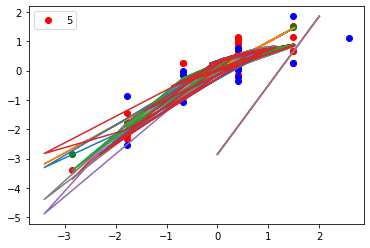

In [36]:
plt.plot(train[:,0], train[:,1],'o',color="red")
plt.plot(validation[:,0], validation[:,0], 'o', color="green")
plt.plot(test[:,0], test[:,1],'o',color="blue")

xp = np.linspace(start = min(data[:,0]), stop = max(data[:,1]), num=3)
for degree in range(1,6):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = mean_square_error(validation,coefs)
    curve = np.polyval(coefs,train)
    plt.plot(train, curve, xp)
    plt.legend([degree])
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree


In [13]:
curve

array([[ 0.54302058,  0.47936193],
       [ 0.54302058,  0.68005311],
       [ 0.85888935,  0.78687099],
       [ 0.54302058,  0.53789555],
       [-1.94327324, -2.69336281],
       [ 0.54302058,  0.71892474],
       [ 0.54302058,  0.62220729],
       [-0.26697955,  0.28549445],
       [-1.94327324, -2.8898359 ],
       [ 0.54302058,  0.65206466],
       [ 0.54302058,  0.74296359],
       [ 0.54302058,  0.65206466],
       [ 0.54302058,  0.77640823],
       [ 0.54302058,  0.22680153],
       [ 0.54302058,  0.47936193],
       [ 0.54302058,  0.22680153],
       [ 0.85888935,  0.65206466],
       [ 0.54302058,  0.47936193],
       [ 0.54302058,  0.77640823],
       [ 0.54302058,  0.36539579],
       [ 0.85888935,  0.65206466],
       [ 0.54302058,  0.65206466],
       [ 0.54302058,  0.60651103],
       [ 0.54302058,  0.51911714],
       [ 0.54302058,  0.47936193],
       [-1.94327324, -1.36818109],
       [ 0.54302058,  0.76560241],
       [-1.94327324, -2.03571343],
       [-3.40273293,

In [14]:
train

array([[ 0.40351793,  0.26676571],
       [ 0.40351793,  0.76715189],
       [ 1.48884201,  1.14244152],
       [ 0.40351793,  0.39186225],
       [-1.76713024, -2.19346633],
       [ 0.40351793,  0.89224843],
       [ 0.40351793,  0.60035649],
       [-0.68180615, -0.06682508],
       [-1.76713024, -2.31856288],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.97564613],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  1.10074267],
       [ 0.40351793, -0.15022277],
       [ 0.40351793,  0.26676571],
       [ 0.40351793, -0.15022277],
       [ 1.48884201,  0.68375419],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  1.10074267],
       [ 0.40351793,  0.05827147],
       [ 1.48884201,  0.68375419],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.55865765],
       [ 0.40351793,  0.3501634 ],
       [ 0.40351793,  0.26676571],
       [-1.76713024, -1.44288707],
       [ 0.40351793,  1.05904382],
       [-1.76713024, -1.8181767 ],
       [-2.85245432,

In [15]:
validation

array([[-2.85245432, -3.19423869],
       [ 0.40351793, -0.15022277],
       [-1.76713024, -1.44288707],
       [-0.68180615,  0.26676571],
       [-0.68180615, -0.56721126],
       [-0.68180615,  0.26676571],
       [-0.68180615, -0.15022277],
       [ 0.40351793,  1.10074267],
       [ 1.48884201,  1.10074267],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  0.76715189],
       [-0.68180615, -0.27531932],
       [ 0.40351793,  0.26676571],
       [-0.68180615, -0.90080204],
       [ 0.40351793, -0.15022277],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  0.26676571],
       [-0.68180615, -0.52551241],
       [-0.68180615, -1.19269398]])

In [16]:
test

array([[-0.68180615, -0.52551241],
       [-1.76713024, -0.85910319],
       [ 0.40351793, -0.35871701],
       [ 0.40351793,  0.01657262],
       [ 2.57416609,  1.10074267],
       [ 0.40351793, -0.23362047],
       [ 1.48884201,  1.85132194],
       [ 0.40351793,  0.76715189],
       [-0.68180615, -0.15022277],
       [-0.68180615, -1.06759743],
       [-0.68180615, -0.02512623],
       [-0.68180615, -0.56721126],
       [ 0.40351793,  0.09997032],
       [ 1.48884201,  0.26676571],
       [ 0.40351793,  0.05827147],
       [-1.76713024, -2.52705712],
       [-0.68180615, -0.15022277],
       [ 0.40351793,  0.72545304],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  0.47525995]])

In [19]:
coefs

array([-0.01052755,  0.00781317,  0.08590661, -0.2986405 ,  0.63582284,
        0.32934243])